In [61]:
# prepare data
words = open('../data/polish-surnames.txt', 'r').read().lower().splitlines()
invalid_chars = ['"', "'", "(", ")", ".", "/", "`"]
def sanitize(w):
    sanitized = w.strip()
    for char in invalid_chars:
        sanitized = sanitized.replace(char, "")
    return sanitized
words = list(map(sanitize, words))

print(len(words))
# take first 10 000 to speed things up for now
# words = words[:10000]

314549


In [62]:
all_chars = sorted(list(set(''.join(words))))
all_chars

['-',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'ß',
 'á',
 'ä',
 'é',
 'ë',
 'ó',
 'ö',
 'ú',
 'ü',
 'ý',
 'ă',
 'ą',
 'ć',
 'č',
 'ę',
 'ě',
 'ľ',
 'ł',
 'ń',
 'ő',
 'ř',
 'ś',
 'š',
 'ű',
 'ź',
 'ż']

In [63]:
import torch

In [64]:
size = len(all_chars)
size

53

In [65]:
size = size + 1 # extra char for '.' (start and end of word)
N = torch.zeros((size, size), dtype=torch.int32)
N

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)

In [66]:
stoi = { s:i+1 for i,s in enumerate(all_chars) }
stoi['.'] = 0
itos = { i:s for s,i in stoi.items() }

In [67]:
for w in words:
    chars = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chars, chars[1:]):
        ic1 = stoi[c1]
        ic2 = stoi[c2]
        N[ic1, ic2] += 1

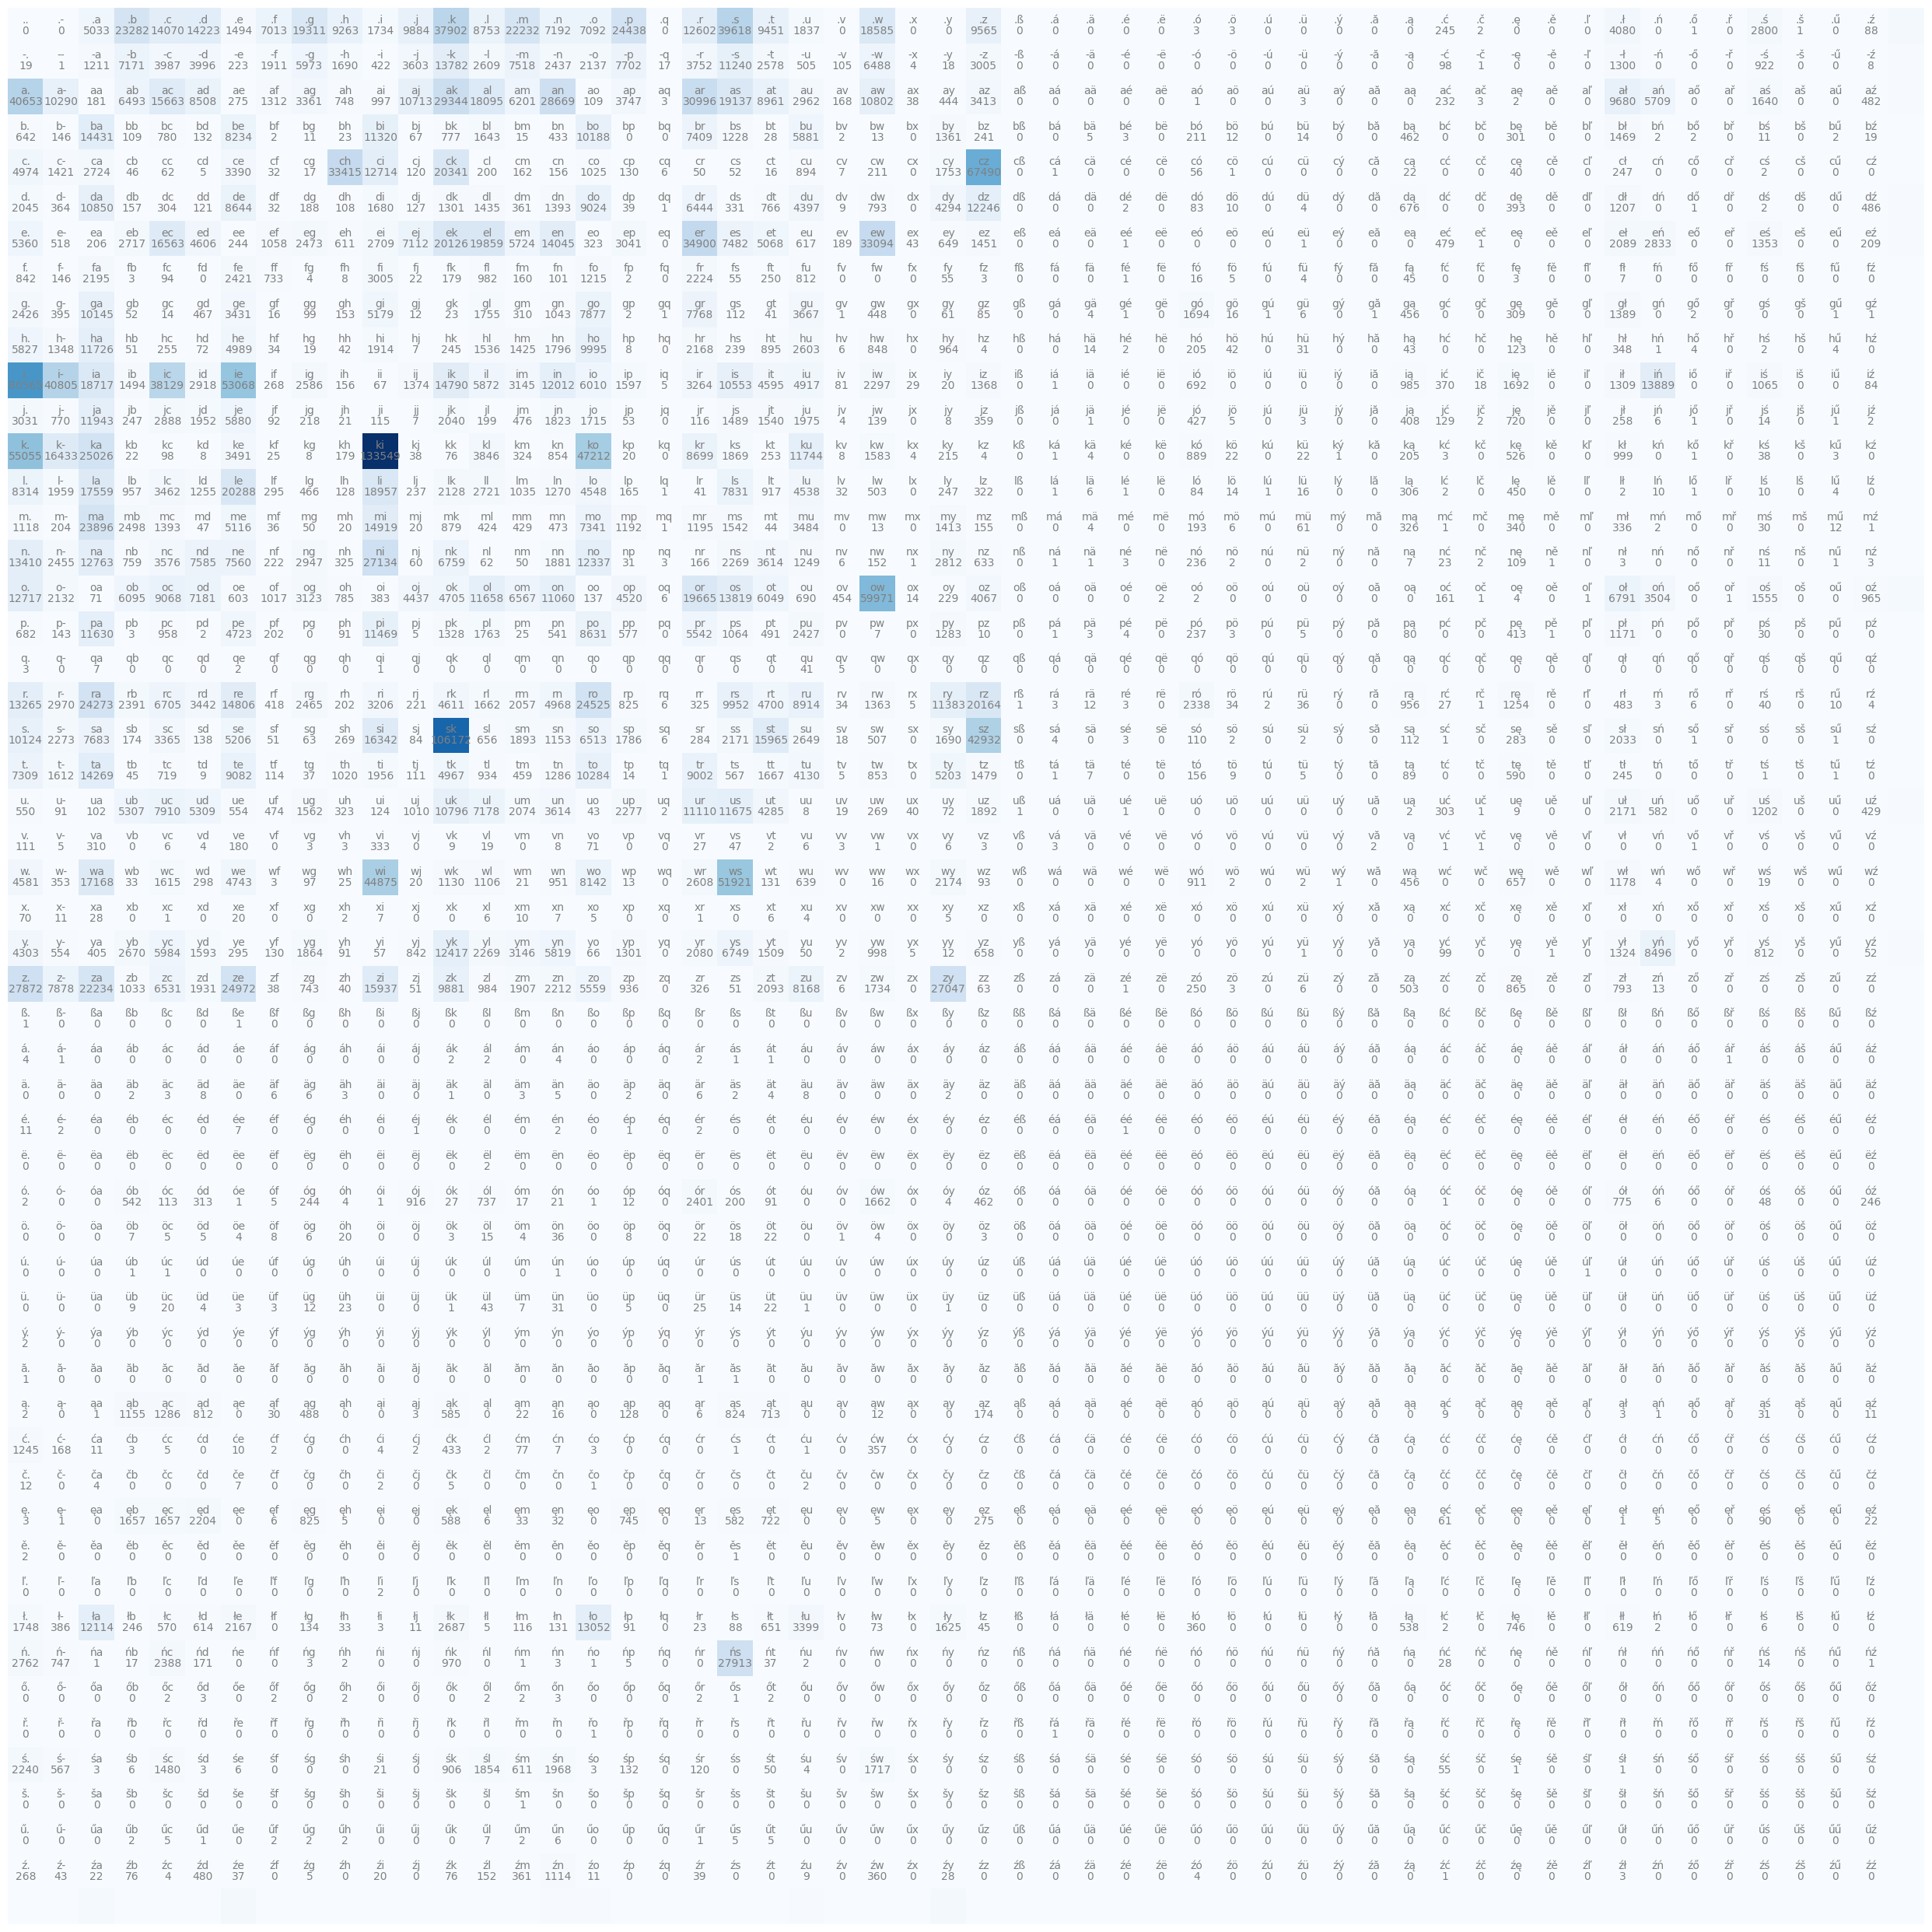

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(32,32))
plt.imshow(N, cmap='Blues')
for i in range(size - 1):
    for j in range(size - 1):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [101]:
P = (N+1).float() # N+1 (adding '1' to smooth the model, avoid 0% probability as log(0) = inf)
P /= P.sum(1, keepdims=True) # probality distribution <0, 1>

print(P[0].sum())
# division
# size   size
# 1      size

tensor(1.)


In [102]:
for i in range(10):
  out = ""
  ix = 0 # starting row
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True).item() # take one (num_samples) item based on distribution
    out = out + itos[ix]
    if ix == 0:
      break
  print(out)

mieichmewiskusnczytrzypik.
kucześ-zkagrzyn.
kieski.
wskosi.
rasarzynarskuśrlerduto.
skor.
duseljagajciemlen.
kłk-mbewskik-klieneli.
berpowoekakiki-wojańskakantotkiuck.
miczucki-miesk.


In [103]:
# loss function
ll = 0.0 # log likelihood
n = 0

for w in words:
    chars = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chars, chars[1:]):
        ic1 = stoi[c1]
        ic2 = stoi[c2]
        prob = P[ic1, ic2]
        ll += torch.log(prob)
        n += 1

nll = -ll
print(f'{ll=}')
print(f'{nll=}')
print(f'{nll/n}')

ll=tensor(-8748673.)
nll=tensor(8748673.)
2.419605255126953
